# W06 - Class Assignment

Feylin Christelia - 0706022310012 & Deborah Michelle K - 0706022310014

In [88]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [89]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [90]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [91]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Data Preprocessing

In [92]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

In [93]:
# pdays - 90% of the data is -1 which can create bias and not informative
# poutcome – there's too much "unknown"
# duration and day – We chose to keep month instead of day and duration because the month of contact can reflect seasonal trends in customer behavior,
# while day adds little predictive value and duration risks data leakage since it’s only known after the call

df = df.drop(columns=['pdays', 'poutcome', 'duration', 'day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  campaign   4521 non-null   int64 
 11  previous   4521 non-null   int64 
 12  y          4521 non-null   object
dtypes: int64(4), object(9)
memory usage: 459.3+ KB


# Visualization

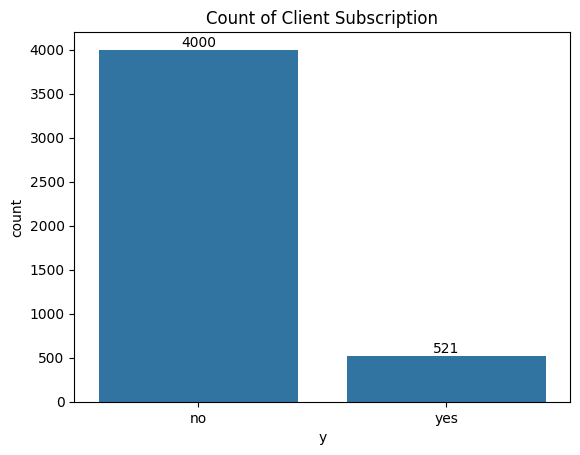

In [94]:
# show how many client subscription
ax = sns.countplot(data=df, x='y')
plt.title('Count of Client Subscription')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

The bar chart shows a significant imbalance between clients who subscribed to the bank’s term deposit and those who did not. Out of the total clients, about 4,000 did not subscribe, while only 521 chose to subscribe. This indicates that the majority of clients were not convinced by the marketing campaign. Therefore it is needed to improve targeting or create communication strategies to increase conversion rates.

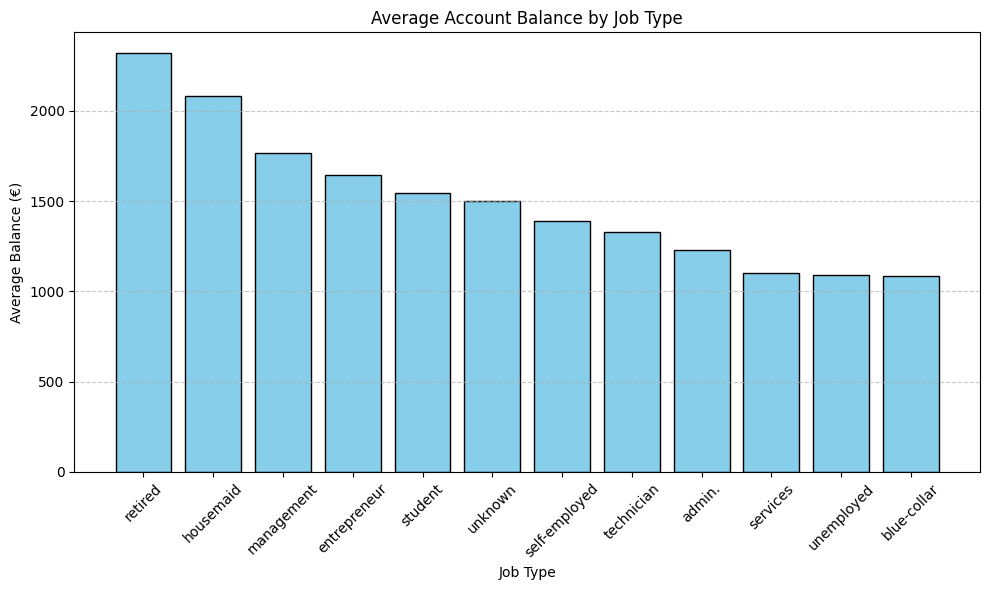

In [95]:
avg_balance = df.groupby('job')['balance'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(avg_balance.index, avg_balance.values, color='skyblue', edgecolor='black')

plt.title('Average Account Balance by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Average Balance (€)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The bar chart illustrates the average account balance by job type, which shows differences in customers’ financial standings. Retired individuals have the highest average balance, followed by housemaids and management professionals, indicating greater financial stability or savings among these groups. In contrast, blue-collar and unemployed clients have the lowest balances, suggesting limited disposable income or saving capacity. These insights can help the bank identify which job segments represent higher-value customers for targeted marketing or premium financial products.


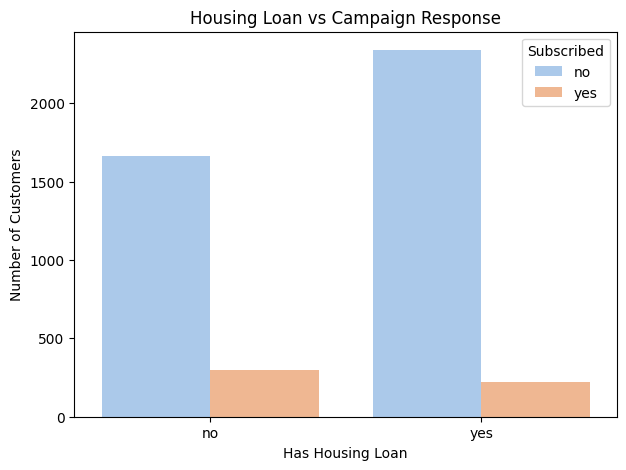

In [96]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='housing', hue='y', palette='pastel')
plt.title('Housing Loan vs Campaign Response')
plt.xlabel('Has Housing Loan')
plt.ylabel('Number of Customers')
plt.legend(title='Subscribed')
plt.show()

The bar chart compares customers’ housing loan status with their response to the bank’s marketing campaign. It shows that clients without housing loans were slightly more likely to subscribe to the term deposit compared to those with existing loans. This suggests that financial commitments like housing loans may reduce customers’ willingness or ability to invest in additional products. The insight implies that future campaigns might perform better when targeting customers with fewer ongoing financial obligations.


In [97]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: y, housing, loan, deafult

one_hot_map = {
    'y': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'default': {'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'marital', 'contact', 'month']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# 3. Ordinal Encoding
education_mapping = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df_encoded['education'] = df_encoded['education'].map(education_mapping)

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11}}


,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,previous,y
2804,28,0.0,2.0,2,0,775,0,0,0.0,4.0,2,0,0
60,41,1.0,1.0,1,0,-516,0,1,1.0,5.0,3,0,0
3782,50,1.0,1.0,2,0,2320,1,0,0.0,0.0,1,0,0
3826,51,0.0,1.0,2,0,423,1,1,0.0,10.0,1,0,0
541,27,9.0,2.0,0,0,59,0,0,0.0,5.0,4,0,0


In [98]:
# checking encode result
df.loc[480]

,480
age,37
job,management
marital,single
education,unknown
default,no
balance,715
housing,yes
loan,no
contact,unknown
month,may


# Separate features and target

### Subtask:
Define the features (X) and the target variable (y).

In [99]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [100]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,previous
0,30,10.0,1.0,1,0,1787,0,0,0.0,10.0,1,0
1,33,7.0,1.0,2,0,4789,1,1,0.0,8.0,1,4
2,35,4.0,2.0,3,0,1350,1,0,0.0,0.0,1,1
3,30,4.0,1.0,3,0,1476,1,1,2.0,6.0,4,0
4,59,1.0,1.0,2,0,0,1,0,2.0,8.0,1,0


In [101]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


# Split data

### Subtask:
Split the encoded data into training and testing sets.

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 12), (1357, 12))

In [104]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,previous
565,40,9.0,1.0,2,0,56,1,1,0.0,4.0,1,1
3480,47,7.0,1.0,2,0,440,1,0,2.0,6.0,1,0
2125,52,9.0,1.0,2,0,3554,0,1,0.0,5.0,1,0
3452,31,0.0,1.0,2,0,0,1,0,0.0,5.0,5,0
1667,33,1.0,1.0,2,0,-346,1,1,2.0,8.0,3,0


In [105]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,campaign,previous
4274,35,1.0,1.0,1,0,378,1,0,2.0,8.0,3,0
72,31,4.0,2.0,3,0,6248,1,0,2.0,8.0,2,0
1065,30,10.0,1.0,3,0,0,1,0,0.0,9.0,1,0
3185,42,0.0,1.0,2,0,529,1,1,0.0,9.0,3,0
130,41,1.0,1.0,1,0,168,1,0,0.0,9.0,3,0


# Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1190
           1       0.19      0.19      0.19       167

    accuracy                           0.80      1357
   macro avg       0.54      0.54      0.54      1357
weighted avg       0.80      0.80      0.80      1357



# Oversampling using SMOTENC

In [107]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job', 'marital', 'education', 'contact', 'month', 'default', 'housing', 'loan'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 12), (2400, 12))

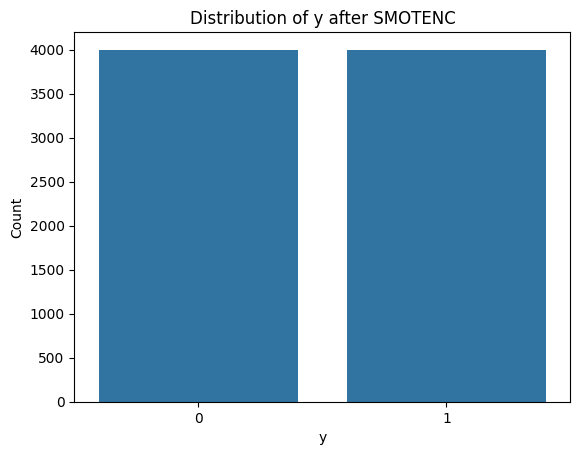

In [139]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  campaign   4521 non-null   int64 
 11  previous   4521 non-null   int64 
 12  y          4521 non-null   object
dtypes: int64(4), object(9)
memory usage: 459.3+ KB


In [110]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1192
           1       0.82      0.84      0.83      1208

    accuracy                           0.82      2400
   macro avg       0.83      0.82      0.82      2400
weighted avg       0.83      0.82      0.82      2400



# KFold (Decision tree)

In [111]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [112]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83323152 0.80621118 0.84468999 0.80098888 0.82820976]
Average score: 0.82


# Feature Importance of Decision Tree

In [113]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.112067   0.09885676 0.04786743 0.04042528 0.00153988 0.28746051
 0.02145045 0.04749337 0.16758446 0.09002793 0.05789082 0.0273361 ]


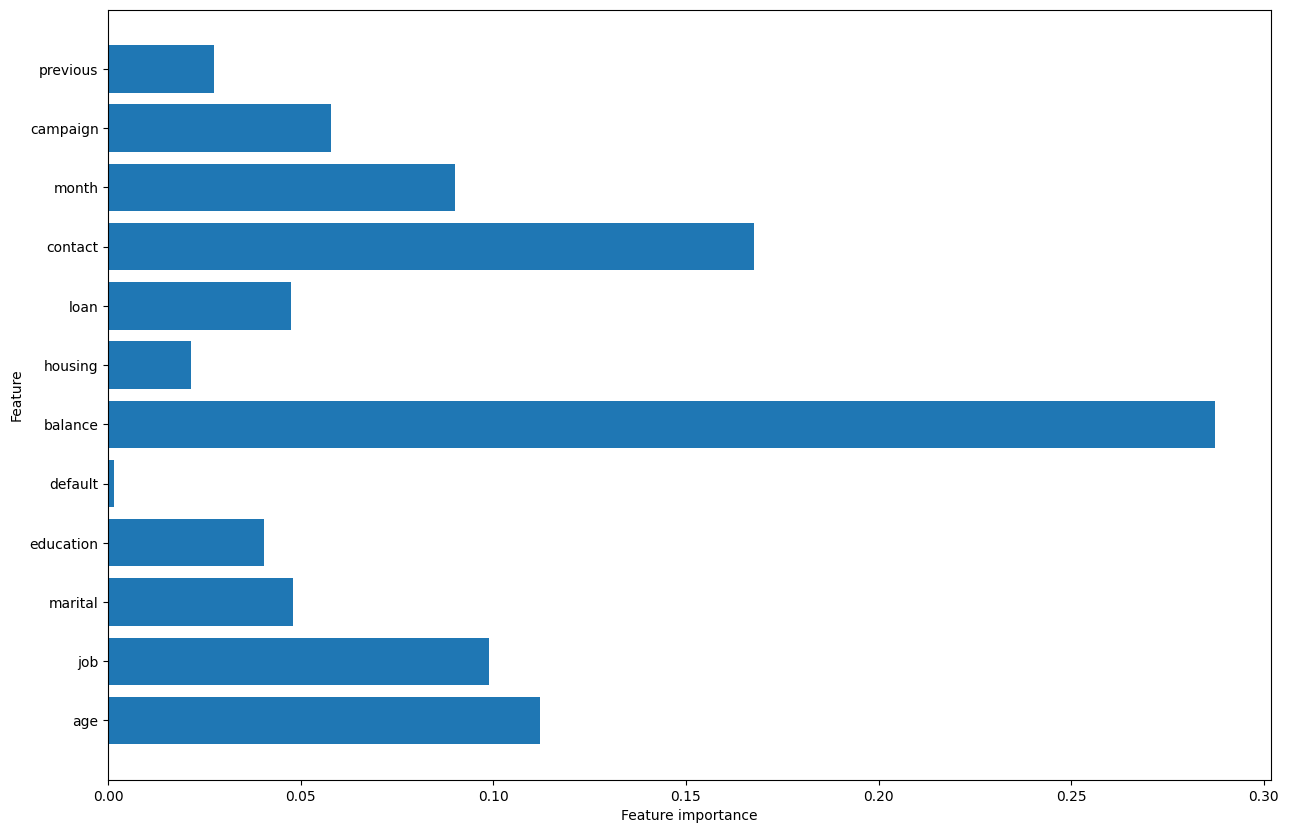

In [114]:
# visualize important features
def plot_feature_importances_y(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_y(tree)

In [115]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
balance,0.287461
contact,0.167584
age,0.112067
job,0.098857
month,0.090028
campaign,0.057891


In [116]:
# using only important features for the prediction
important_features = [
'balance',
'contact',
'age',
'month',
'housing',
'job',
'campaign',
'loan'
]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [117]:
display(X_importance)
display(y_importance)

,balance,contact,age,month,housing,job,campaign,loan
0,1787,0.0,30,10.0,0,10.0,1,0
1,4789,0.0,33,8.0,1,7.0,1,1
2,1350,0.0,35,0.0,1,4.0,1,0
3,1476,2.0,30,6.0,1,4.0,4,1
4,0,2.0,59,8.0,1,1.0,1,0
...,...,...,...,...,...,...,...,...
4516,-333,0.0,33,5.0,1,7.0,5,0
4517,-3313,2.0,57,8.0,1,6.0,1,1
4518,295,0.0,57,1.0,0,9.0,11,0
4519,1137,0.0,28,3.0,0,1.0,4,0


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [118]:
# oversampling againnn
categorical_features = ["month", "housing", "job", "loan", "contact"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 8), (2400, 8))

In [119]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1206
           1       0.79      0.84      0.82      1194

    accuracy                           0.81      2400
   macro avg       0.81      0.81      0.81      2400
weighted avg       0.81      0.81      0.81      2400



# Hyperparameter Tuning using Grid Search (Decision Tree)

In [120]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}
Best cross-validation f1 score: 0.781


In [121]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      2808
           1       0.80      0.90      0.84      2792

    accuracy                           0.83      5600
   macro avg       0.84      0.83      0.83      5600
weighted avg       0.84      0.83      0.83      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      1192
           1       0.75      0.86      0.80      1208

    accuracy                           0.79      2400
   macro avg       0.79      0.79      0.79      2400
weighted avg       0.79      0.79      0.79      2400



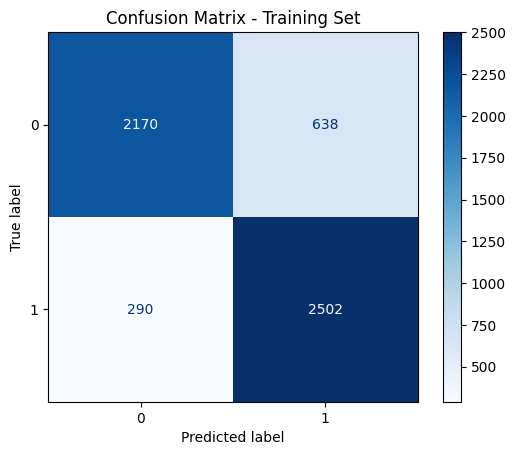

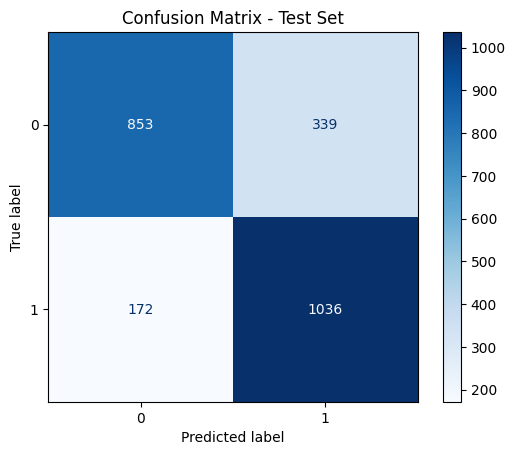

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=final_tree.classes_)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Set")
plt.show()

cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=final_tree.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()


# Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1192
           1       0.84      0.89      0.86      1208

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



# KFold (Random Forest)

In [124]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [125]:
from sklearn.ensemble import GradientBoostingClassifier

score = cross_val_score(RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.87123947 0.87661142 0.88536585 0.85217391 0.8727491 ]
Average score: 0.87


# Feature Importance of Random Forest

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split data
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(
    X_importance, y_importance, test_size=0.3, random_state=42
)

# Inisialisasi Random Forest Classifier
importance_rf = RandomForestClassifier(random_state=42)

# Latih model
importance_rf.fit(X_train_importance, y_train_importance)

# Prediksi data train & test
y_pred_train_importance = importance_rf.predict(X_train_importance)
y_pred_test_importance = importance_rf.predict(X_test_importance)

# Tampilkan hasil evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2794
           1       1.00      1.00      1.00      2806

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1206
           1       0.83      0.88      0.86      1194

    accuracy                           0.85      2400
   macro avg       0.85      0.85      0.85      2400
weighted avg       0.85      0.85      0.85      2400



# Hyperparameter Tuning using Grid Search (Random Forest)

In [127]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'random_state': [0, 42]
}

rf_clf = RandomForestClassifier()
grid_rf = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid_rf,
    n_jobs=-1,
    verbose=1,
    scoring='f1'
)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best parameters:", grid_rf.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_rf.best_score_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300, 'random_state': 42}
Best cross-validation f1 score: 0.857


In [128]:
best_params_rf = grid_rf.best_params_
final_rf = RandomForestClassifier(**best_params_rf)
final_rf.fit(X_train, y_train)

y_pred_train_rf = final_rf.predict(X_train)
y_pred_test_rf = final_rf.predict(X_test)

print("\n=== Classification Report — (Train Set) ===")
print(classification_report(y_train, y_pred_train_rf))

print("\n=== Classification Report — (Test Set) ===")
print(classification_report(y_test, y_pred_test_rf))


=== Classification Report — (Train Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report — (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1192
           1       0.84      0.90      0.87      1208

    accuracy                           0.86      2400
   macro avg       0.87      0.86      0.86      2400
weighted avg       0.87      0.86      0.86      2400



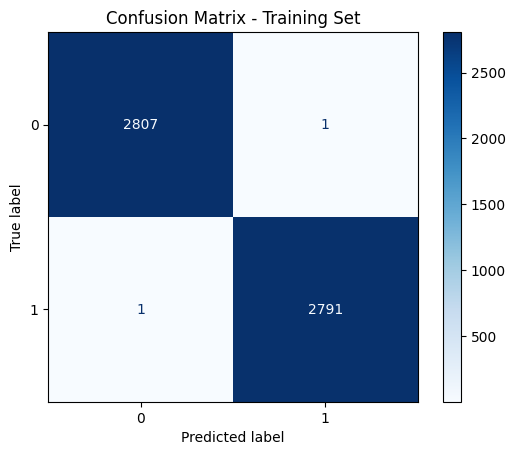

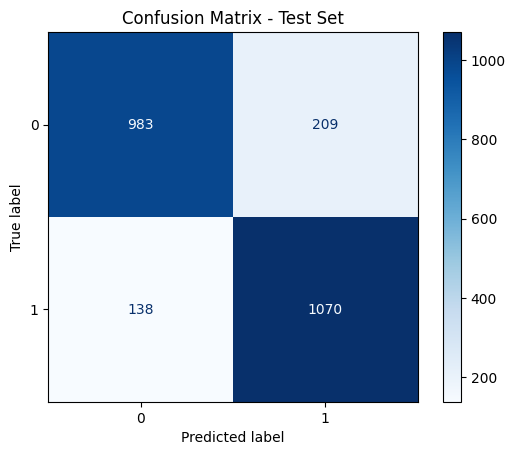

In [129]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=final_tree.classes_)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Set")
plt.show()

cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=final_tree.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()


# Gradient Boosting Classifier

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      2808
           1       0.76      0.89      0.82      2792

    accuracy                           0.81      5600
   macro avg       0.82      0.81      0.81      5600
weighted avg       0.82      0.81      0.81      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1192
           1       0.76      0.87      0.81      1208

    accuracy                           0.80      2400
   macro avg       0.80      0.79      0.79      2400
weighted avg       0.80      0.80      0.79      2400



# KFold (Gradient Boosting)

In [131]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [132]:
from sklearn.ensemble import GradientBoostingClassifier

score = cross_val_score(GradientBoostingClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.80879865 0.82224771 0.83362119 0.79861111 0.82013575]
Average score: 0.82


# Feature Importance of Gradient Boosting

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split data
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(
    X_importance, y_importance, test_size=0.3, random_state=42
)

# Inisialisasi Gradient Boosting Classifier
importance_gb = GradientBoostingClassifier(random_state=42)

# Latih model
importance_gb.fit(X_train_importance, y_train_importance)

# Prediksi data train & test
y_pred_train_importance = importance_gb.predict(X_train_importance)
y_pred_test_importance = importance_gb.predict(X_test_importance)

# Tampilkan hasil evaluasi
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2794
           1       0.77      0.89      0.83      2806

    accuracy                           0.81      5600
   macro avg       0.82      0.81      0.81      5600
weighted avg       0.82      0.81      0.81      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.71      0.77      1206
           1       0.75      0.88      0.81      1194

    accuracy                           0.79      2400
   macro avg       0.80      0.79      0.79      2400
weighted avg       0.80      0.79      0.79      2400



# Hyperparameter Tuning using Grid Search (Gradient Boosting)

In [134]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'random_state': [0, 42]
}

# Initialize a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

# Grid Search with F1 scoring
grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    n_jobs=-1,
    verbose=2,
    scoring='f1',
    cv=5
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best model
best_gb_clf = grid_search.best_estimator_
y_pred_test = best_gb_clf.predict(X_test)

# Print results
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation F1 score: {:.3f}".format(grid_search.best_score_))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'random_state': 0, 'subsample': 1.0}
Best cross-validation F1 score: 0.867


In [135]:
best_params = grid_search.best_params_

final_tree = GradientBoostingClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2808
           1       0.97      0.99      0.98      2792

    accuracy                           0.98      5600
   macro avg       0.98      0.98      0.98      5600
weighted avg       0.98      0.98      0.98      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1192
           1       0.85      0.90      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



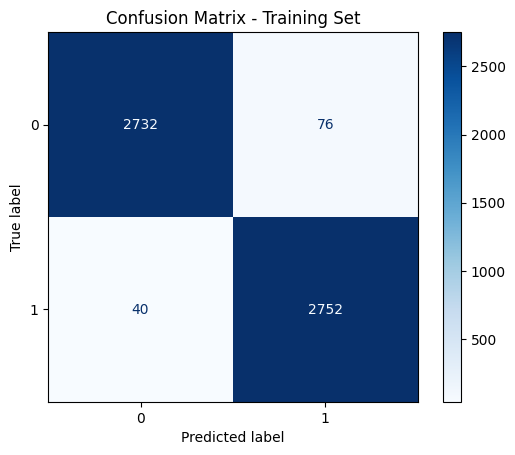

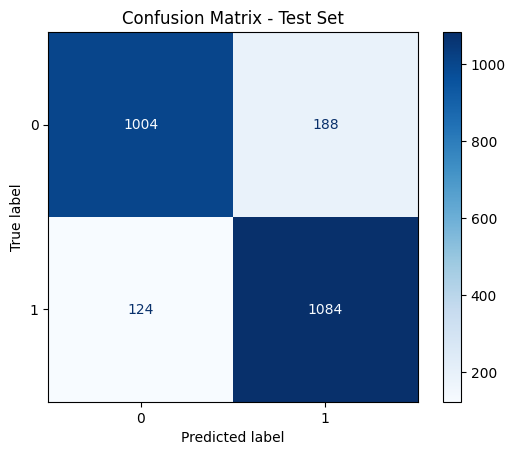

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=final_tree.classes_)
disp_train.plot(cmap='Blues')
plt.title("Confusion Matrix - Training Set")
plt.show()

cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=final_tree.classes_)
disp_test.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Set")
plt.show()


# Comparison Table Hyperparameter Tuning of Each Classifier Model

In [137]:
data = {
    "Model": ["Decision Tree", "Decision Tree",
              "Random Forest", "Random Forest",
              "Gradient Boosting", "Gradient Boosting"],
    "Dataset": ["Train", "Test", "Train", "Test", "Train", "Test"],
    "Accuracy": [0.83, 0.79, 1.00, 0.86, 0.98, 0.87],
    "Precision": [0.84, 0.79, 1.00, 0.87, 0.98, 0.87],
    "Recall": [0.83, 0.79, 1.00, 0.86, 0.98, 0.87],
    "F1-score": [0.83, 0.79, 1.00, 0.86, 0.98, 0.87]
}

df_results = pd.DataFrame(data)
print(df_results)


               Model Dataset  Accuracy  Precision  Recall  F1-score
0      Decision Tree   Train      0.83       0.84    0.83      0.83
1      Decision Tree    Test      0.79       0.79    0.79      0.79
2      Random Forest   Train      1.00       1.00    1.00      1.00
3      Random Forest    Test      0.86       0.87    0.86      0.86
4  Gradient Boosting   Train      0.98       0.98    0.98      0.98
5  Gradient Boosting    Test      0.87       0.87    0.87      0.87


# Discussion & Insights

## Which model performed best overall?
Among the three models tested, Gradient Boosting emerged as the best-performing model overall. It achieved the highest accuracy of 0.87 on the test set, along with consistently balanced precision, recall, and F1-scores, indicating strong predictive ability and generalization to unseen data. In comparison, Random Forest also performed well with an accuracy of 0.86, but slightly lower overall. Meanwhile, the Decision Tree model showed the weakest performance (0.79 accuracy), suggesting it may be too simple to capture the complex patterns in the data. Overall, Gradient Boosting offers the most reliable and stable performance for this classification task.

## Did ensemble methods (RF, XGBoost) improve performance compared to a single Decision Tree?
Yes. The ensemble methods (Random Forest and XGBoost) clearly improved performance compared to the single Decision Tree model. The Decision Tree had the lowest accuracy and F1-score, indicating a tendency to overfit and limited generalization. In contrast, both ensemble models combined the predictions of multiple trees to reduce variance and enhance robustness. Random Forest improved overall accuracy and consistency across metrics, while XGBoost achieved the best performance among all models, further boosting predictive power through its gradient boosting technique. This confirms that ensemble learning effectively enhances model accuracy and stability compared to a single Decision Tree.

## How could the bank use these insights to refine its marketing strategy?
The bank can use these insights to target customers more effectively and optimize campaign resources. Since the models (especially XGBoost) can identify which factors most influence a customer’s likelihood to subscribe, the bank can focus marketing efforts on segments with higher predicted responsiveness. For example, customers with stable jobs, higher balances, or specific age and education groups. Additionally, the bank could personalize marketing messages based on these key features, use data-driven segmentation to tailor offers, and reduce costs by minimizing outreach to customers less likely to respond. Overall, these insights help the bank move toward a more efficient, targeted, and customer-centric marketing approach.